# **Quelques techniques de preprocessing d'image**

Ce notebook présente les techniques de bases de pré-traitement d'images, entre autres. Tout est [là](https://www.analyticsvidhya.com/blog/2019/03/opencv-functions-computer-vision-python/)

In [1]:
# import des librairies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2

### **1. Chargement, sauvegarde et affichage d'images**

In [2]:
# lecture de l'image
img = cv2.imread('lena.jpg')

In [3]:
# sauvegarde de l'image
cv2.imwrite('write_lena.jpg', img)

True

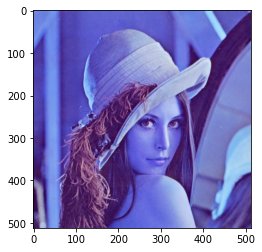

In [4]:
# affichage de l'image
plt.imshow(img);

On voit qu'il y a un problème au niveau de l'espace des couleurs...

### **2. Conversion du format de couleurs**

Dans OpenCV, le format des couleurs par défaut est BGR et non RGB.  
Il faut donc convertir pour avoir les bonnes couleurs.  
Évidemment d'autres conversions sont possibles.

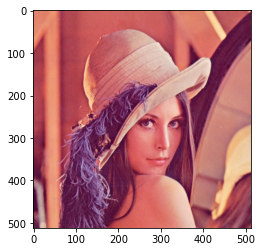

In [5]:
# Conversion RGB/BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

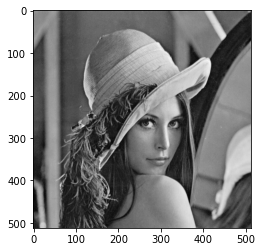

In [6]:
# Conversion en échelle de gris
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, 'gray');

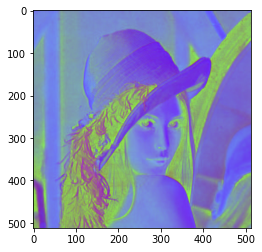

In [7]:
# Conversion au format HSV
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img);

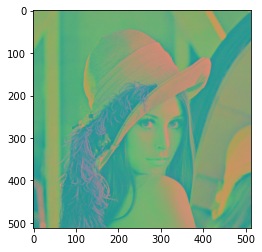

In [8]:
# Conversion au format YUV
yuv_img = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
plt.imshow(yuv_img);

### **3. Resizing ou scaling (changer la taille quoi...)**

(512, 512, 3)


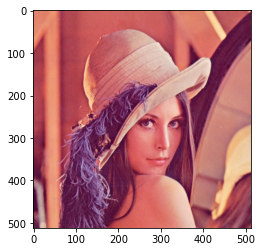

In [9]:
print(img.shape)
plt.imshow(img);

(100, 100, 3)


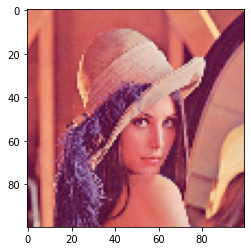

In [10]:
# Conversion en une image (100,100,3) 
img_100_100 = cv2.resize(img, (100,100), interpolation=cv2.INTER_LINEAR)
print(img_100_100.shape)
plt.imshow(img_100_100);

(1024, 1024, 3)


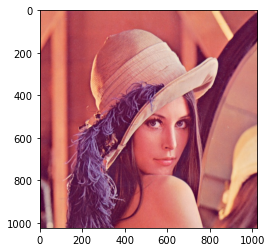

In [11]:
# Conversion en une image 2 fois plus grande
h,l = img.shape[:2]
img_x2 = cv2.resize(img, (2*h,2*l), interpolation=cv2.INTER_CUBIC)
print(img_x2.shape)
plt.imshow(img_x2);

### **4. Translation**

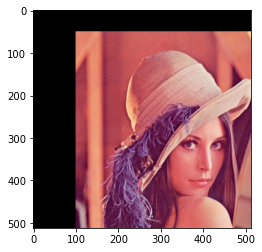

In [12]:
# dimension de l'image
h,l = img.shape[:2]

# matrice de translation (décalge de 100px en X et 50px en Y)
M = np.float32([[1,0,100],[0,1,50]])

#transformation de l'image via la matrice de translation
img_translatee = cv2.warpAffine(img, M, (h,l)) 

# affichage de l'image
plt.imshow(img_translatee);

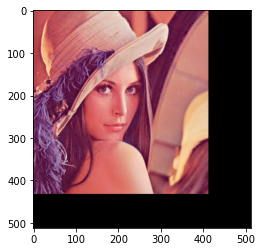

In [13]:
# dimension de l'image
h,l = img.shape[:2]

# matrice de translation (décalge de -100px en X et -80px en Y)
M = np.float32([[1,0,-100],[0,1,-80]])

#transformation de l'image via la matrice de translation
img_translatee = cv2.warpAffine(img, M, (h,l)) 

# affichage de l'image
plt.imshow(img_translatee);

### **5. Rotation**

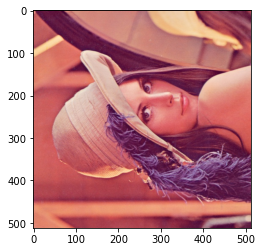

In [14]:
# dimension de l'image
h,l = img.shape[:2]

# matrice de rotation
M = cv2.getRotationMatrix2D((h/2,l/2),90,1)

#transformation de l'image via la matrice de rotation
img_tournee = cv2.warpAffine(img, M, (h,l)) 

# affichage de l'image
plt.imshow(img_tournee);

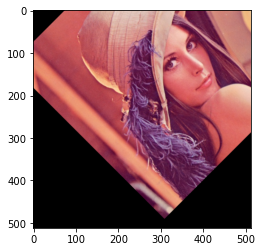

In [15]:
h,l = img.shape[:2]
M = cv2.getRotationMatrix2D((h/4,l/4),45,1) 
img_tournee = cv2.warpAffine(img, M, (h,l)) 
plt.imshow(img_tournee);

Il y a d'autres transformations : en particulier transformations affine et perspective. Ici ne sont présentées que les plus simples.

### **6. Seuillage ou thresholding**

Consiste à comparer la valeur d'un pixel à unseuil fixé. **N'est applicable que sur une image grayscale**

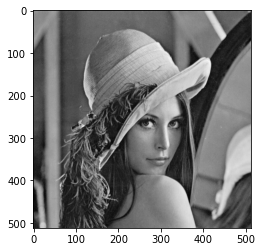

In [16]:
plt.imshow(gray_img, 'gray');

#### **6.1. Seuillage simple**

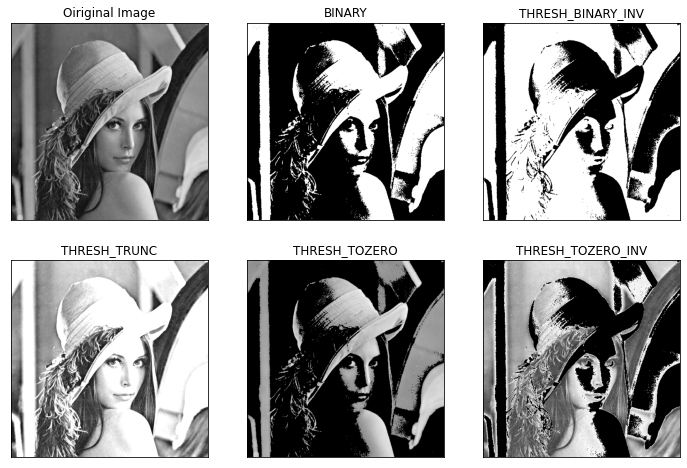

In [17]:
ret,thresh_binary = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_img, 127, 255, cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_img, 127, 255, cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_img, 127, 255, cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = [gray_img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

#### **6.2. Seuillage adaptatif**

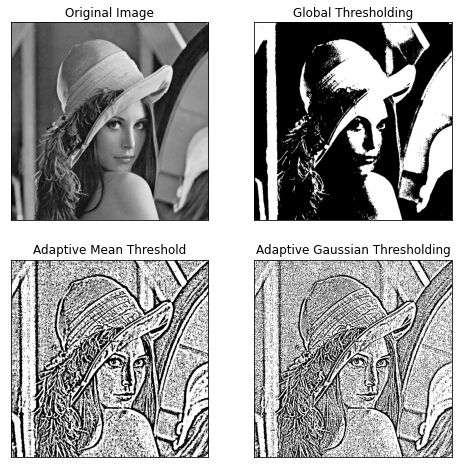

In [18]:
ret, thresh_global = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)

thresh_mean = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_img, thresh_global, thresh_mean, thresh_gaussian]

plt.figure(figsize=(8, 8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

### **7. Cropping ou recadrage ou rognage**

Consiste à ne sélectionner qu'une partie de l'image seulement : le plus est d'utiliser le slicing puisque les images sont des `np.array` pour faire un recadrage rectangulaire

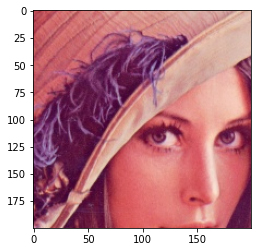

In [19]:
img_crop = img[150:350, 150:350]
plt.imshow(img_crop);

### **8. Détection des bords/traits (edges)**

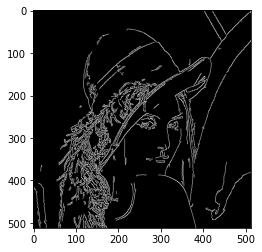

In [20]:
edges = cv2.Canny(gray_img,100,200)
plt.imshow(edges, 'gray');

### **9. Contours**

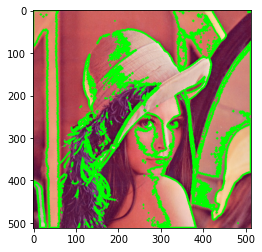

In [21]:
ret, thresh = cv2.threshold(gray_img, 127, 255, 0) 

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img2 = cv2.cvtColor(cv2.imread('lena.jpg'), cv2.COLOR_BGR2RGB)
cv2.drawContours(img2, contours,-1,(0,255,0),3)
plt.imshow(img2);

C'est pas fifou car l'image en input est assez complexe mais certain contours sont bien délimités...à tester sur une image plus simple, des objets disposés sur un fond uni par exemple.

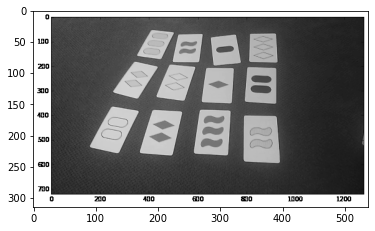

In [22]:
new_img = cv2.cvtColor(cv2.imread('img_contours.png'), cv2.COLOR_BGR2RGB)
new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2GRAY)
plt.imshow(new_img, 'gray');

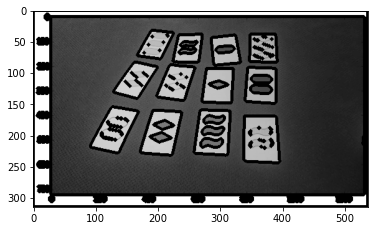

In [23]:
ret, thresh = cv2.threshold(new_img, 127, 255, 0) 

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(new_img, contours,-1,(0,255,0),3)
plt.imshow(new_img, 'gray');

### **10. Filtrage**

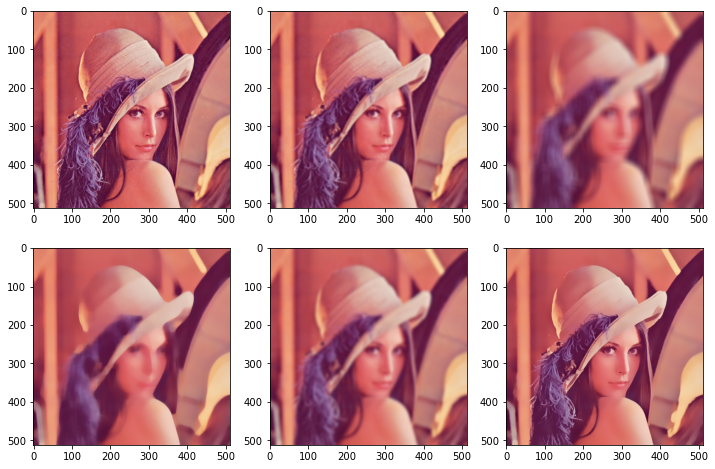

In [24]:
images = [img,
          cv2.blur(img, (5,5)),
          cv2.blur(img, (20,20)),
          cv2.medianBlur(img, 21),
          cv2.GaussianBlur(img, (21,21), 0),
          cv2.bilateralFilter(img, 21,51,51)]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
plt.show()